# 위스콘신 유방암 데이터 분류

유방에서 만져지는 덩어리에 대한 세침 흡인 검사(FNA, 유방생검)를 통해 수집된 표본의 세포핵의 특성을 설명하는 데이터를 통해 암이 양성인지 악성인지 예측하기 위한 데이터 셋

> https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

> https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../../'))
sys.path.append(work_path)
from helper.regrassion import *
from helper.plot import *
from helper.util import *
from helper.analysis import *
from helper.classification import *
import warnings
warnings.filterwarnings(action='ignore')

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

### [2] 데이터 가져오기

| 변수 | 설명 |
|---|---|
| id | 일련번호
| diagnosis | 유방조직의 진단 (`M`=악성, `B`=양성) |
| 그 밖의 변수 | 종양 세포에 관한 의학적 지표들 |

In [2]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/breast-cancer-wisconsin.xlsx',index_col='id')
my_pretty_table(origin.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [4]:
origin['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## #02. 탐색적 데이터 분석

### [1] 상자그림

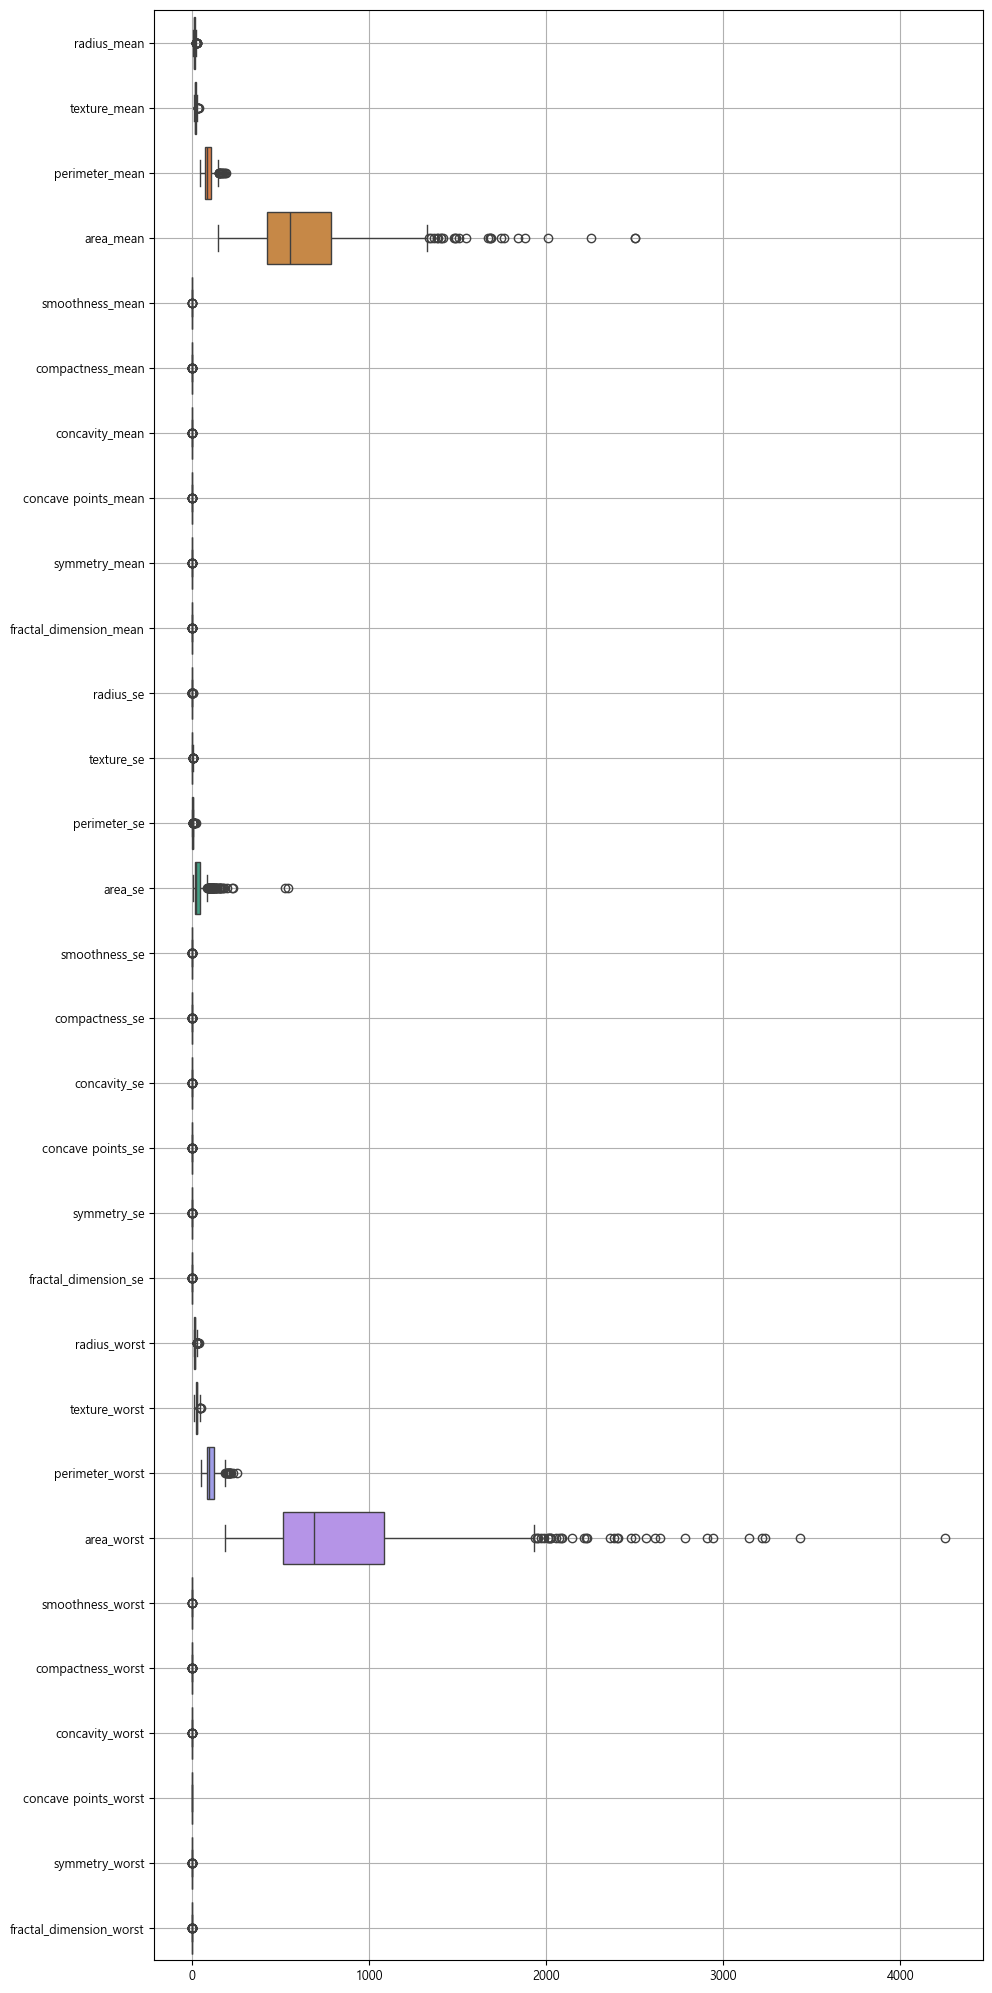

In [6]:
my_boxplot(origin, orient='h',figsize=(10,20))

### [2] 종속변수에 따른 데이터 분포 비교

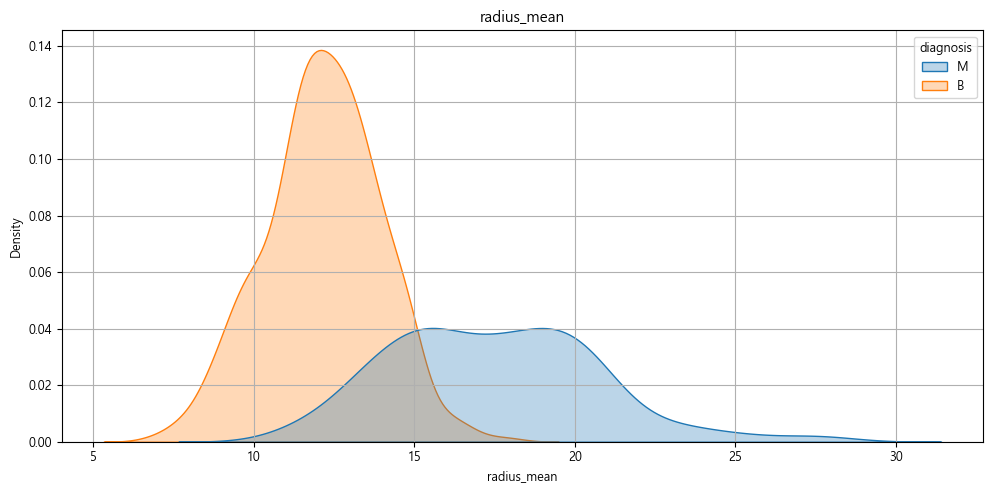

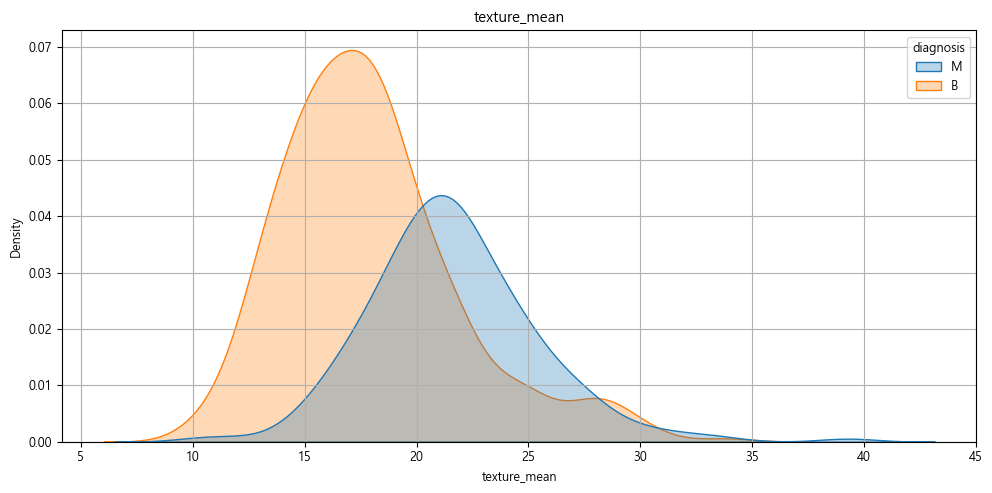

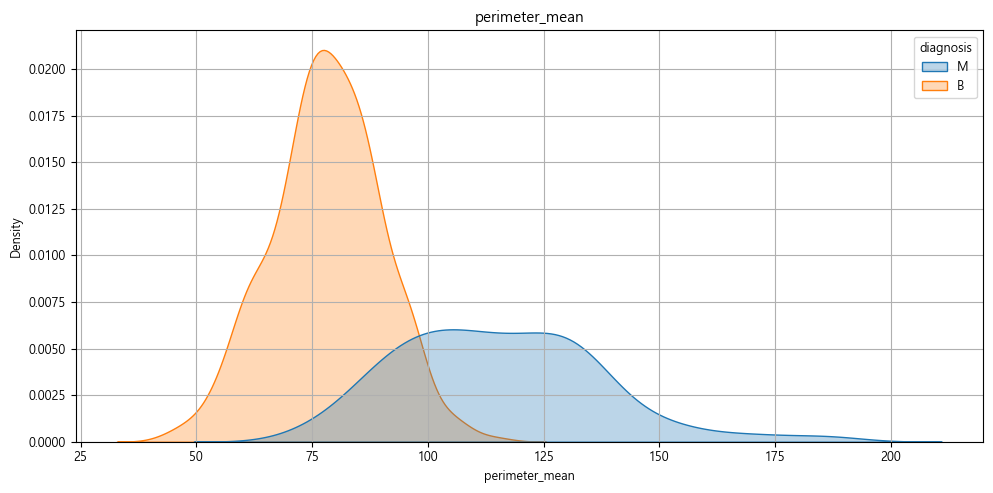

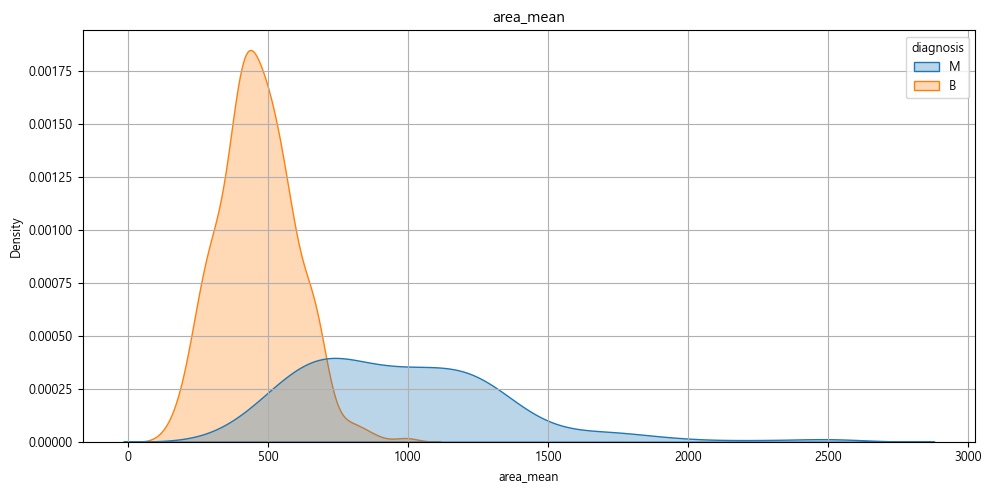

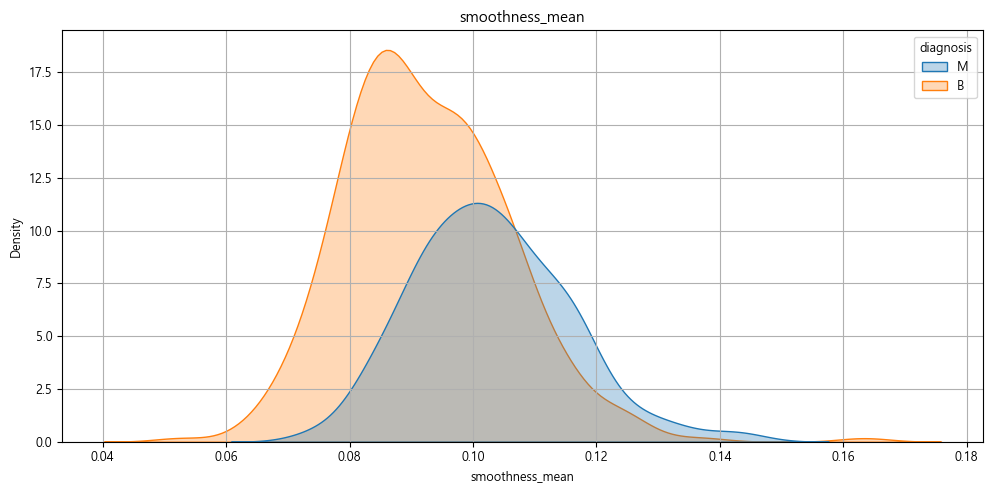

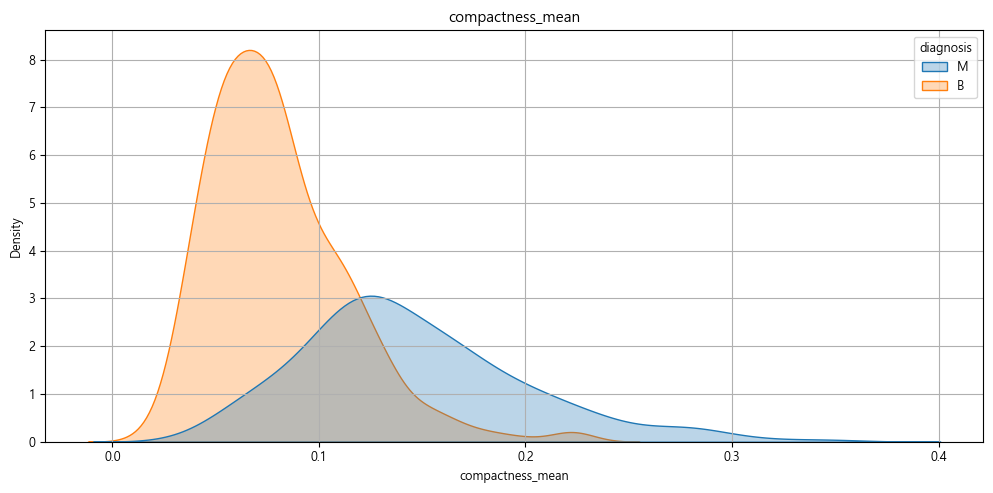

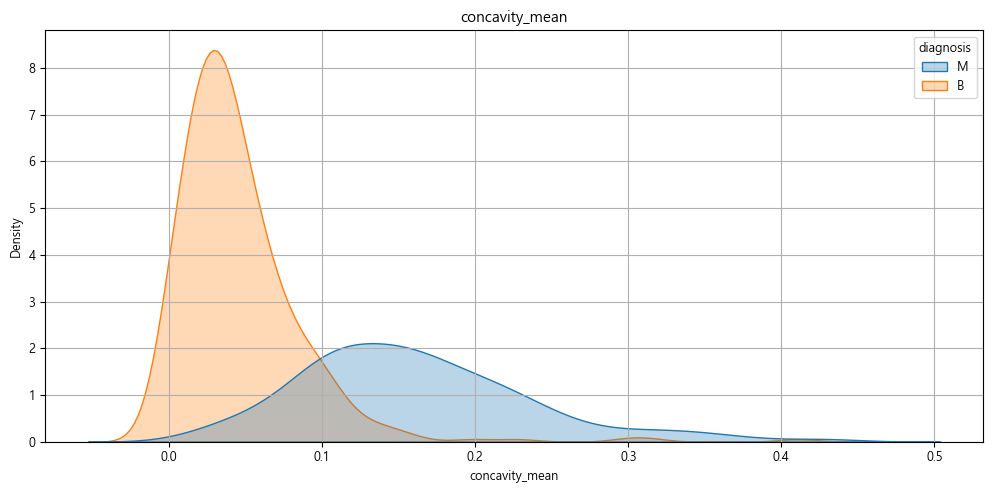

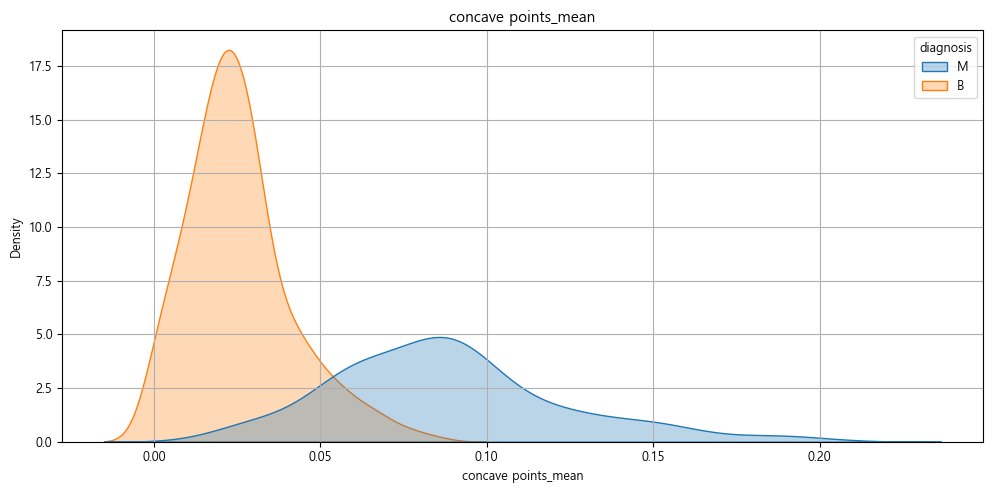

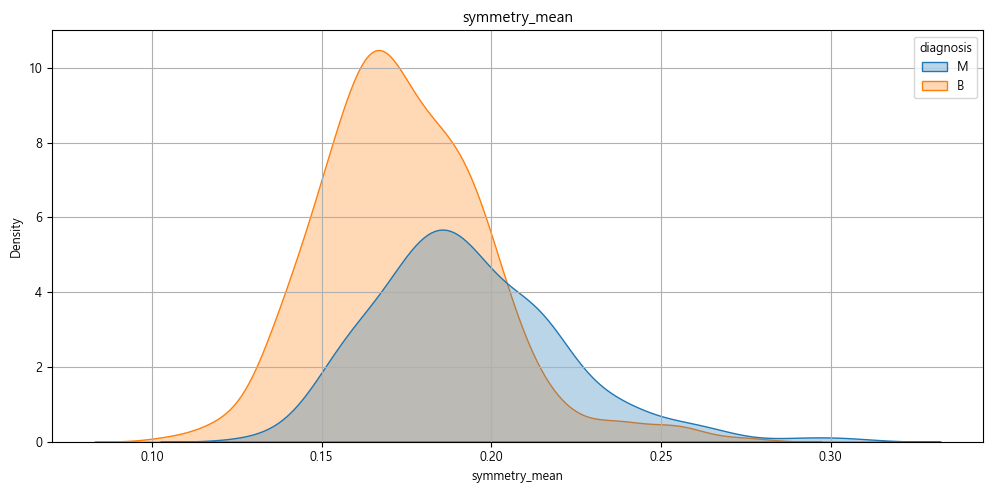

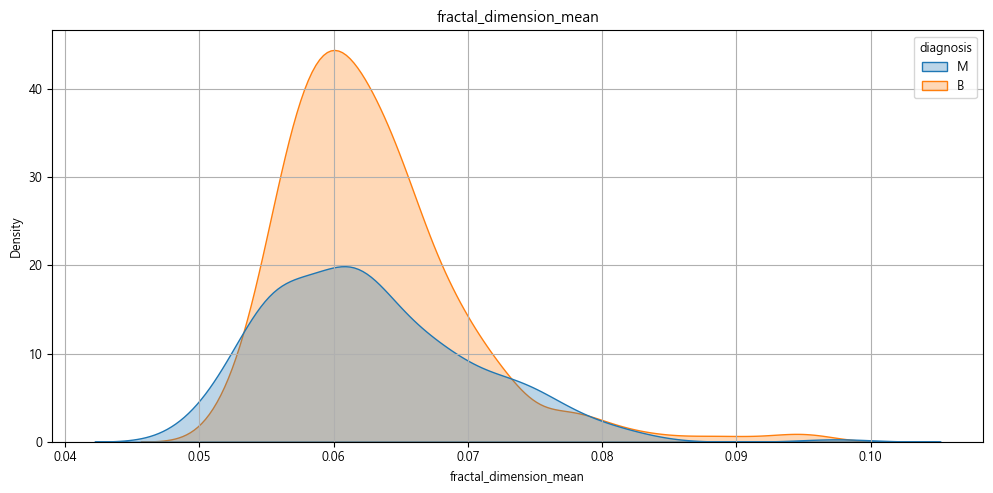

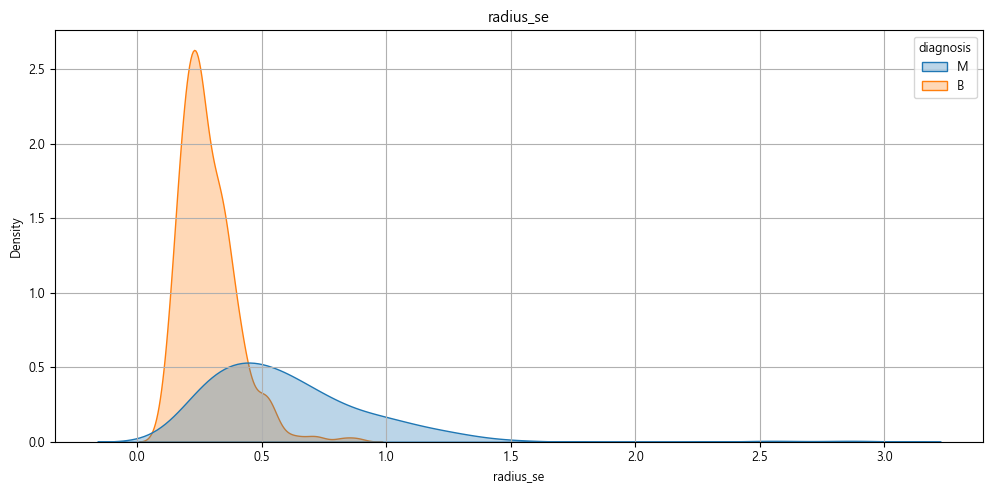

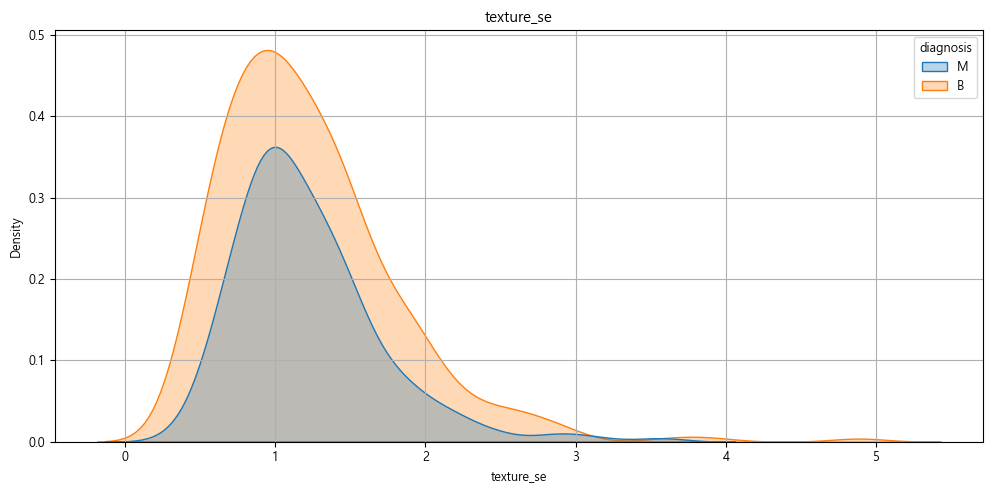

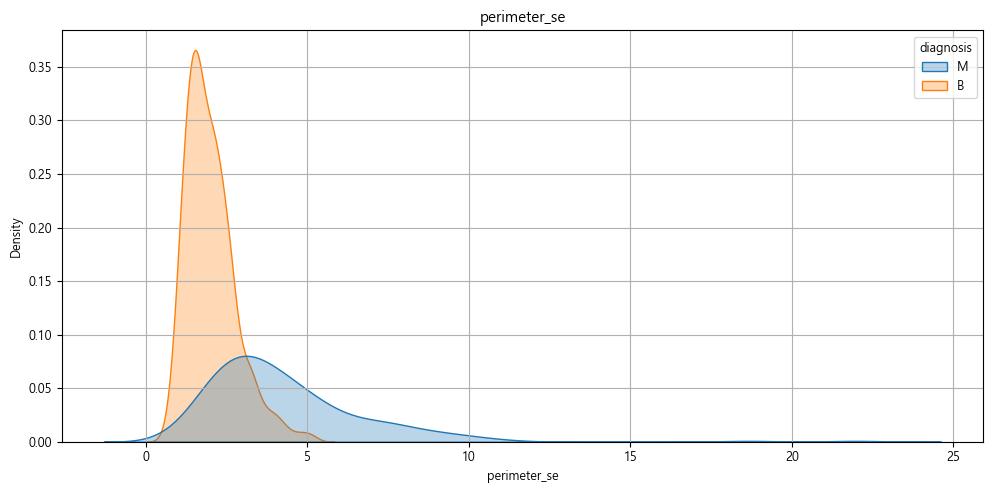

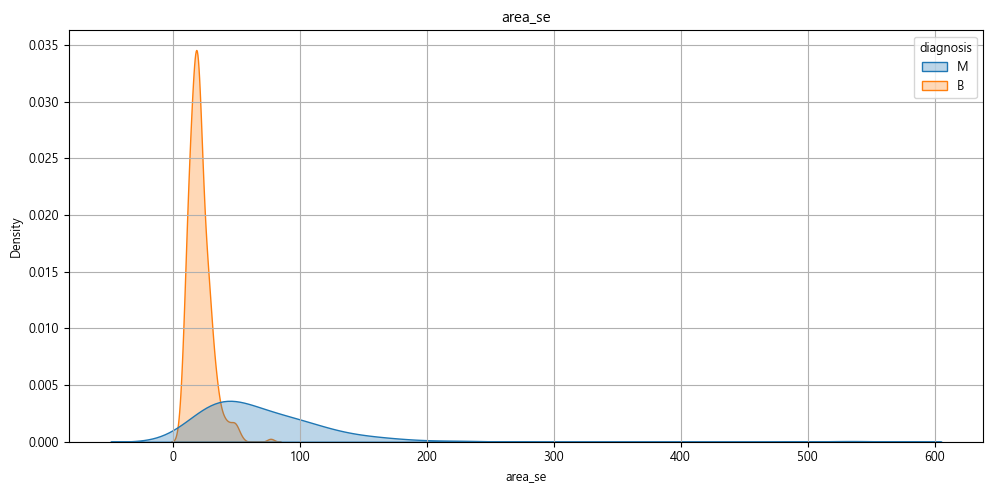

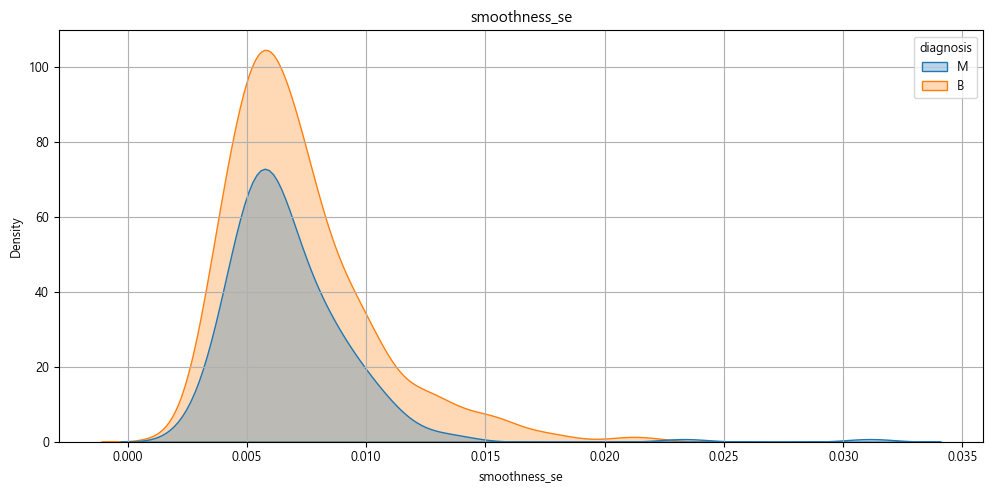

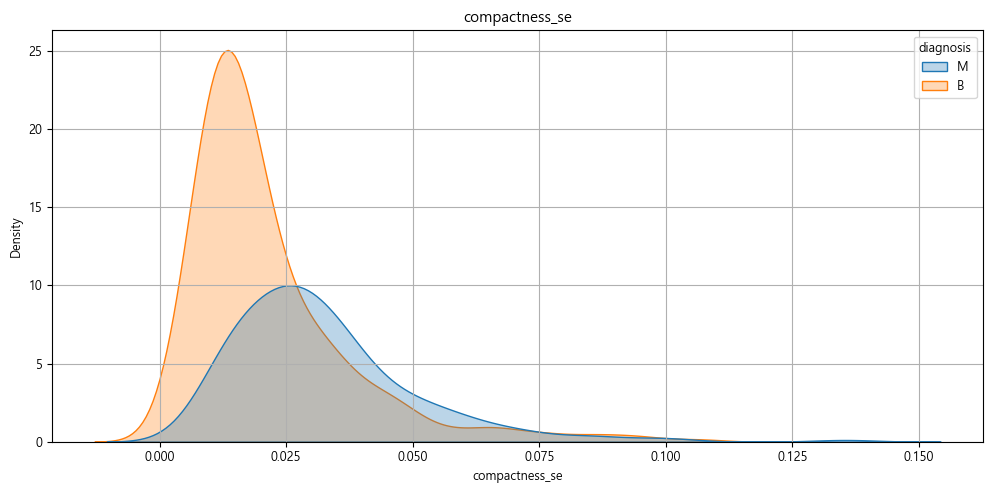

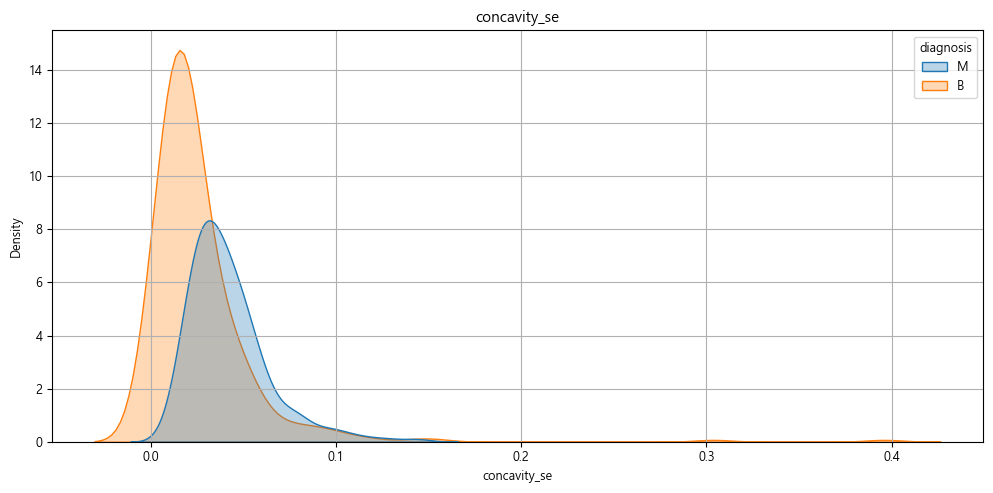

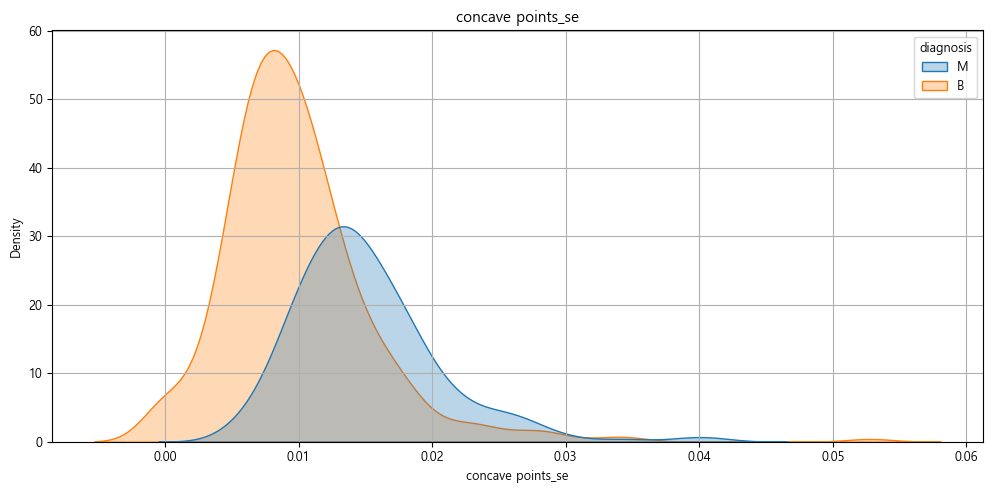

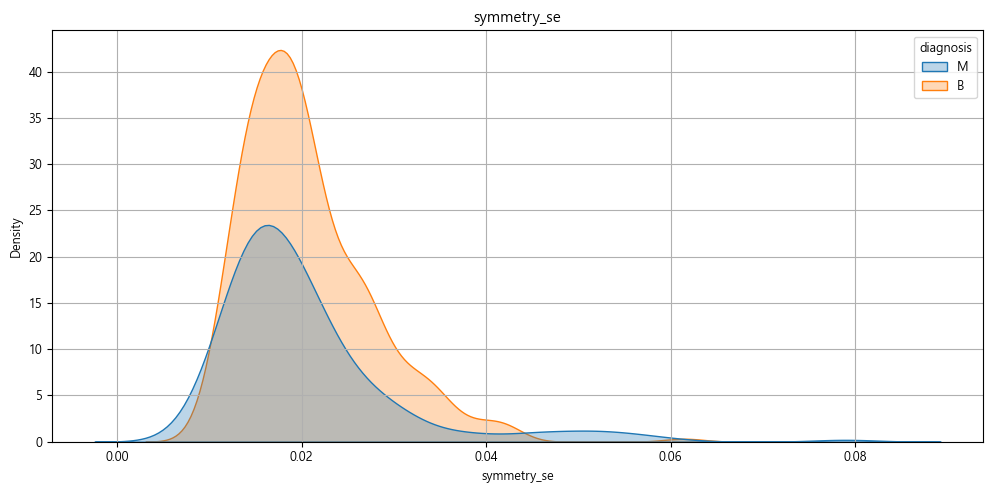

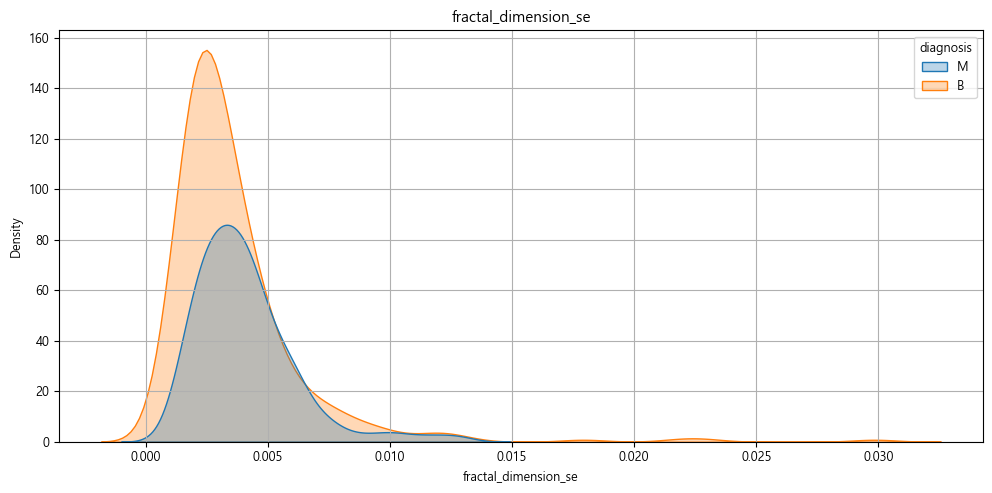

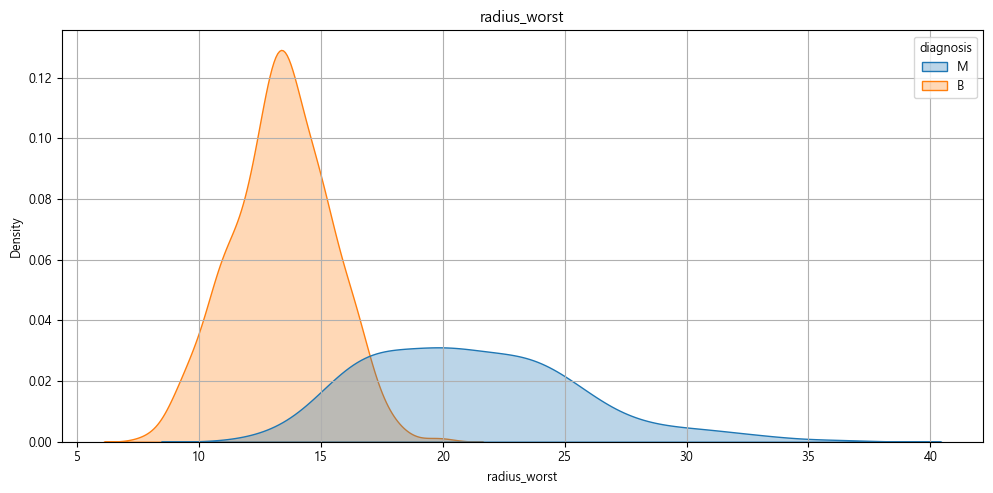

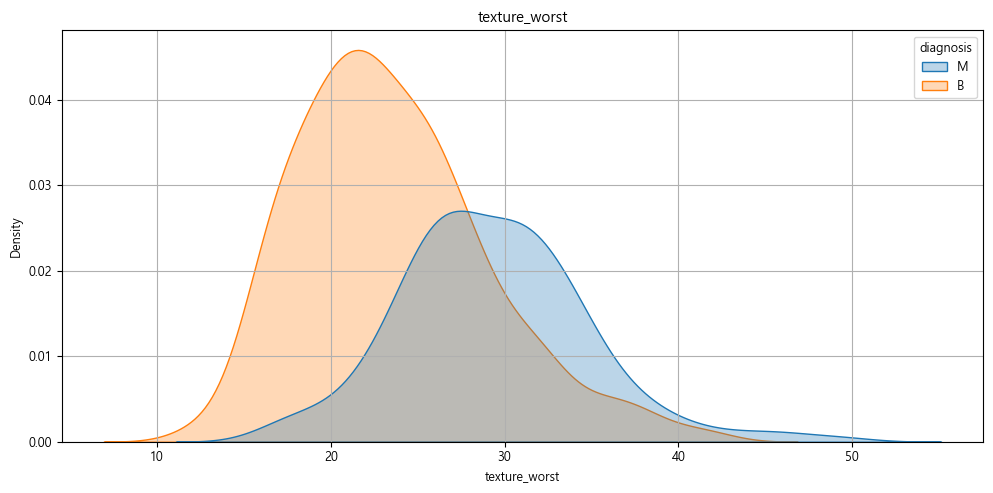

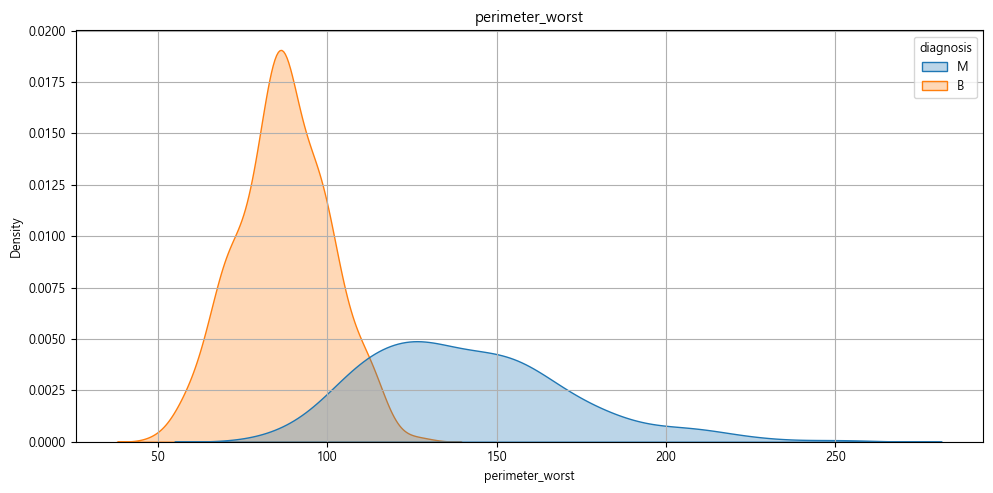

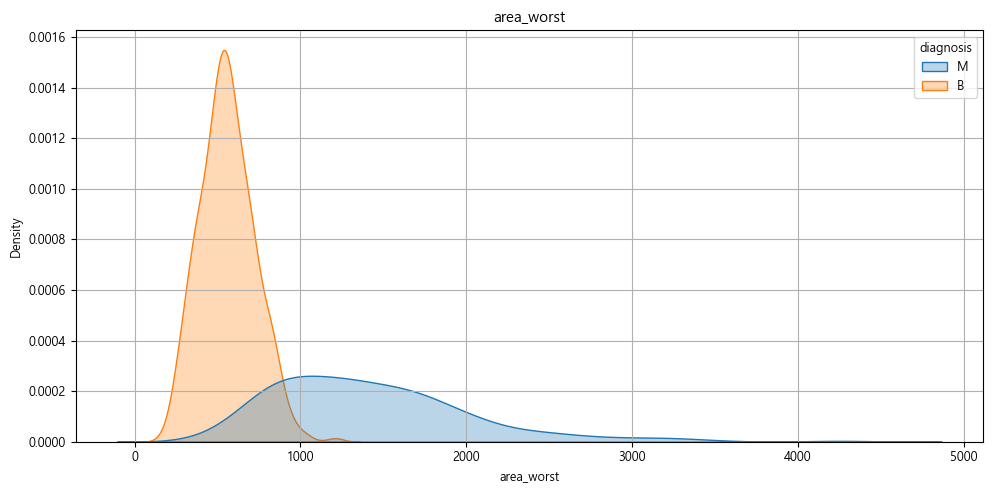

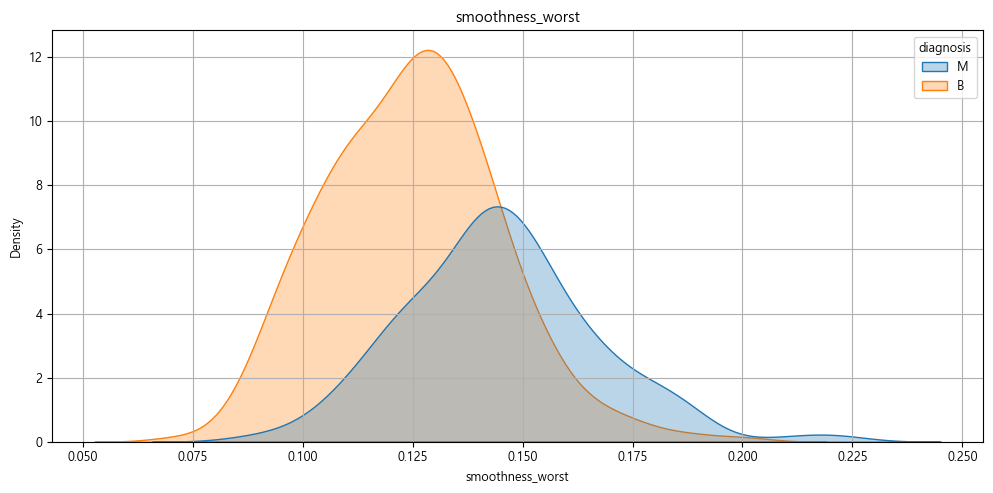

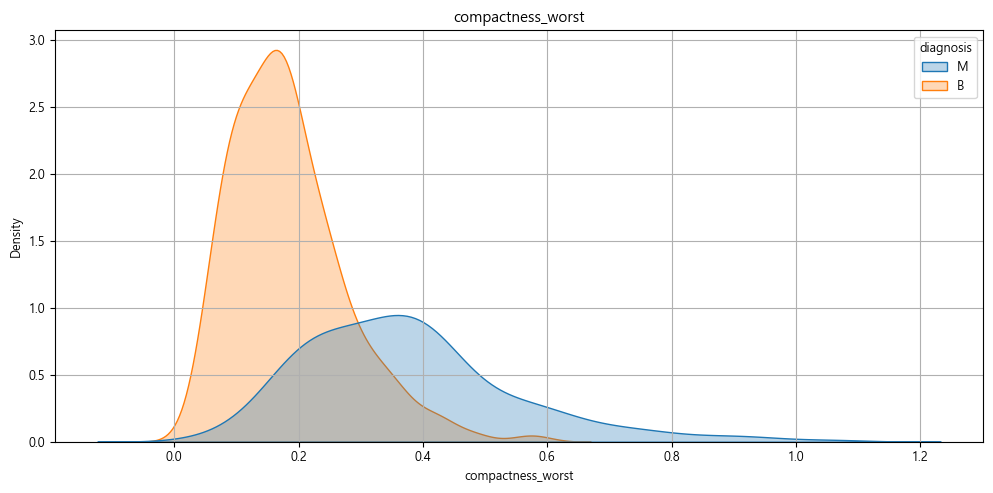

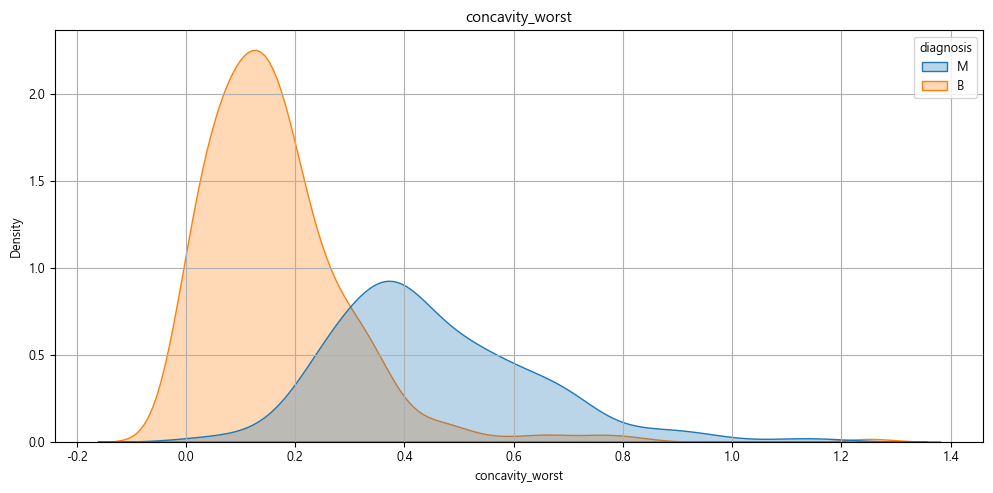

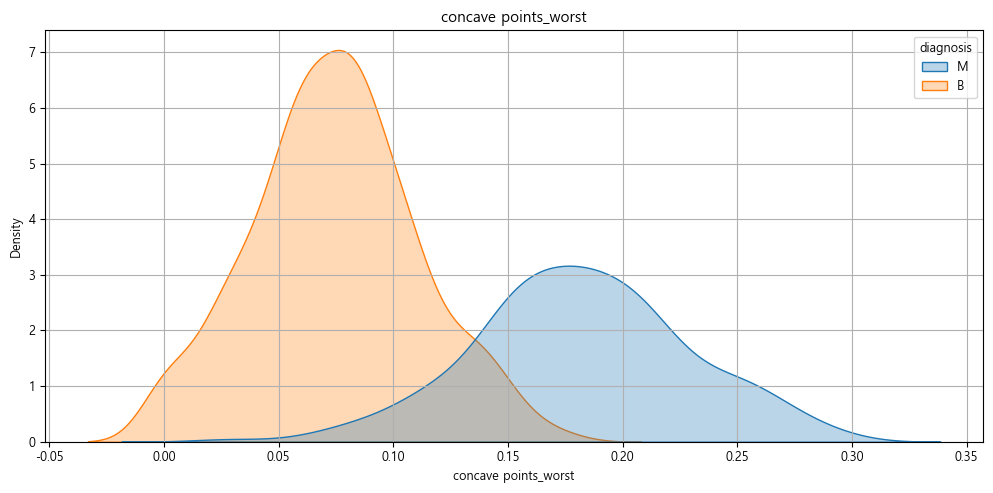

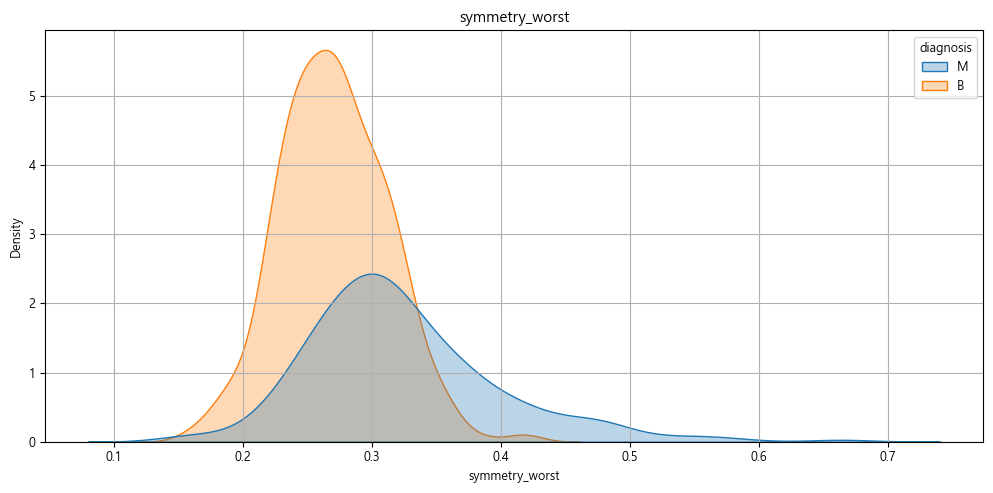

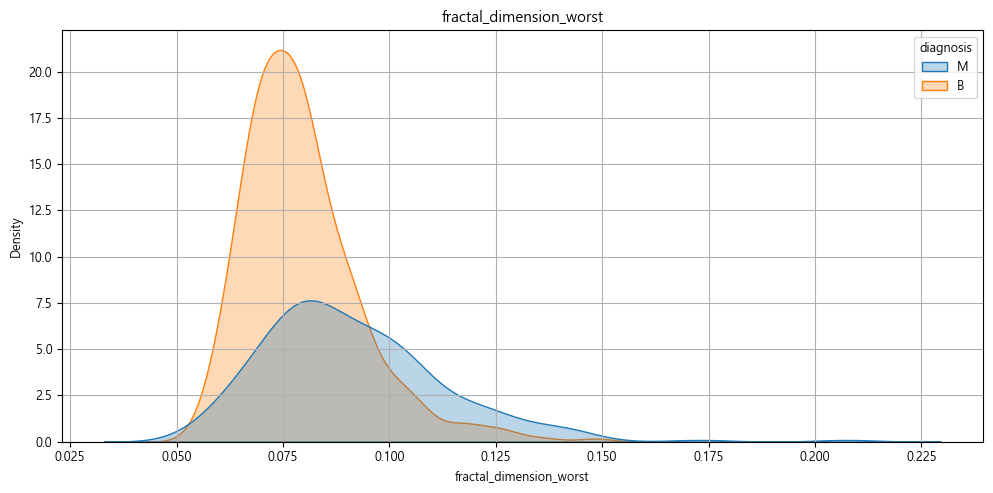

In [7]:
yname = 'diagnosis'
xnames = list(origin.drop(yname, axis=1).columns)
for i in xnames:
    if origin[i].dtype == 'category':
        my_kdeplot(origin,xname=i, hue=yname, fill=True,dpi=100, callback=lambda ax: ax.set_title(i))

    else:
        my_kdeplot(origin, xname=i, hue=yname, fill=True, dpi=100, callback=lambda ax: ax.set_title(i))

In [8]:
origin.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# 종속변수 라벨링
#'M':악성='1', 'B':음성='0'
df = my_labelling(origin, 'diagnosis')
my_pretty_table(df.head())

+----------+-------------+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+
|       id |   diagnosis |   radius_mean |   texture_mean |   perimeter_mean |   area_mean |   smoothness_mean |   compactness_mean |   concavity_mean |   concave points_mean |   symmetry_mean |   fractal_dimension_mean |   radius_se |   texture_se |   perimeter_se |   area_se |   smoothness_se |   compactness_se |   concavity_se |   concave points_se |   symmetry_se |   fractal_dimension_se |  

In [10]:
df2= my_standard_scaler(df,yname='diagnosis')
my_pretty_table(df2.head())

+----------+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+-------------+
|       id |   radius_mean |   texture_mean |   perimeter_mean |   area_mean |   smoothness_mean |   compactness_mean |   concavity_mean |   concave points_mean |   symmetry_mean |   fractal_dimension_mean |   radius_se |   texture_se |   perimeter_se |   area_se |   smoothness_se |   compactness_se |   concavity_se |   concave points_se |   symmetry_se |   fractal_dimension_se |   radius_worst 

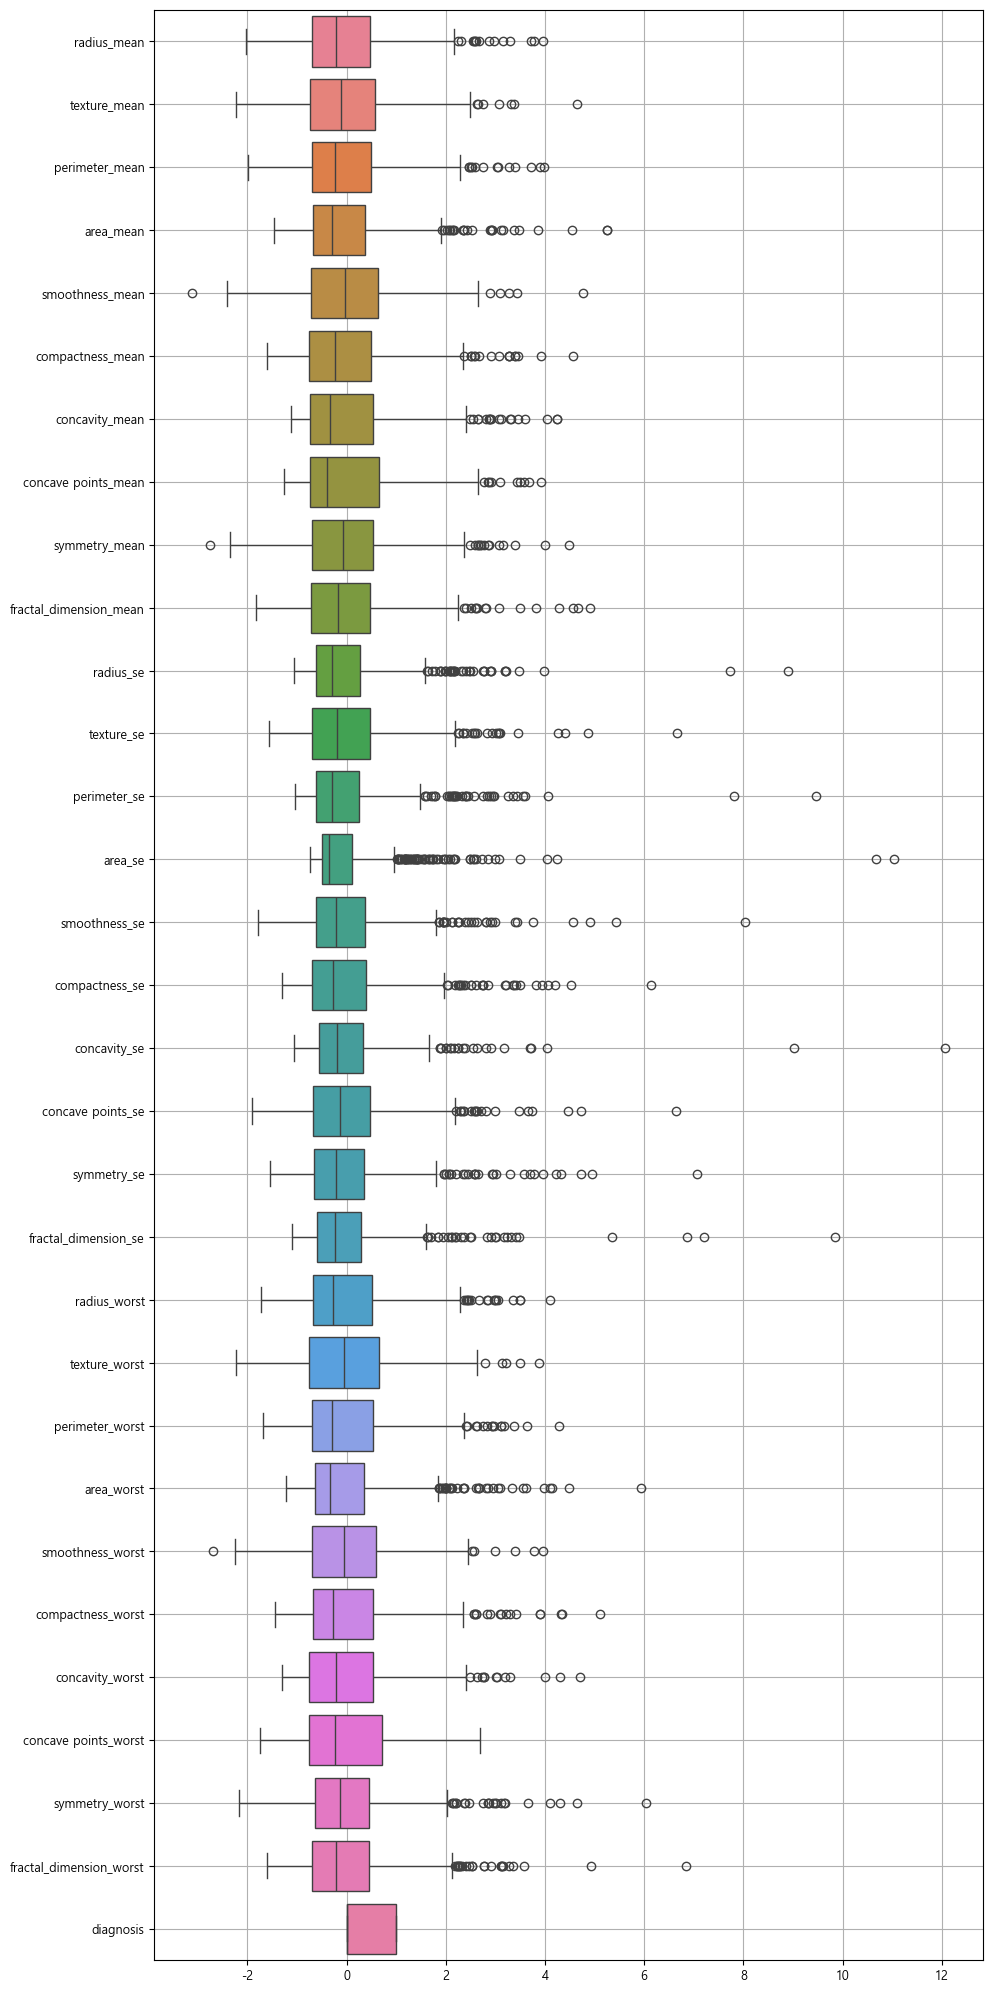

In [11]:
my_boxplot(df2, orient='h',figsize=(10,20))

## #03. 모든 데이터를 활용한 기본 분석 모형 구현

### [1] 데이터 분할

In [12]:
# 기본 분석 모형

x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='diagnosis')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

### [2] 로지스틱 회귀

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.978022 |
| 10 |     1 | l2        |          0.978022 |
| 13 |    10 | l2        |          0.971429 |
| 16 |   100 | l2        |          0.967033 |
|  4 |  0.01 | l2        |          0.945055 |
|  1 | 0.001 | l2        |          0.883516 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.869719 |     0.859307 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.982418 |     0.982456 | 예측 결과(TN,FP,TP,TN)가 실제 결과

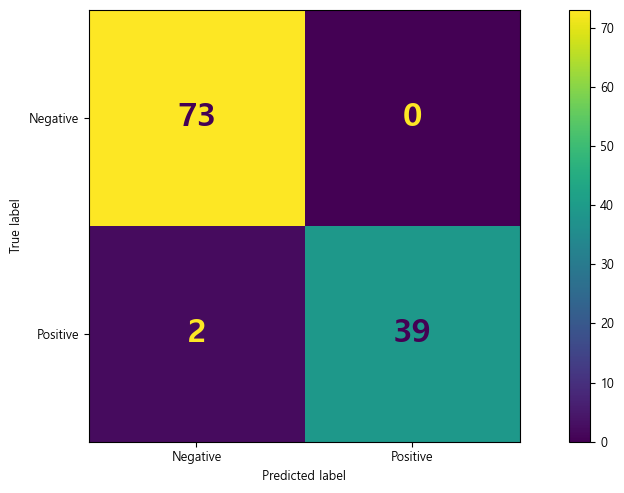


[ROC/PR Curve]


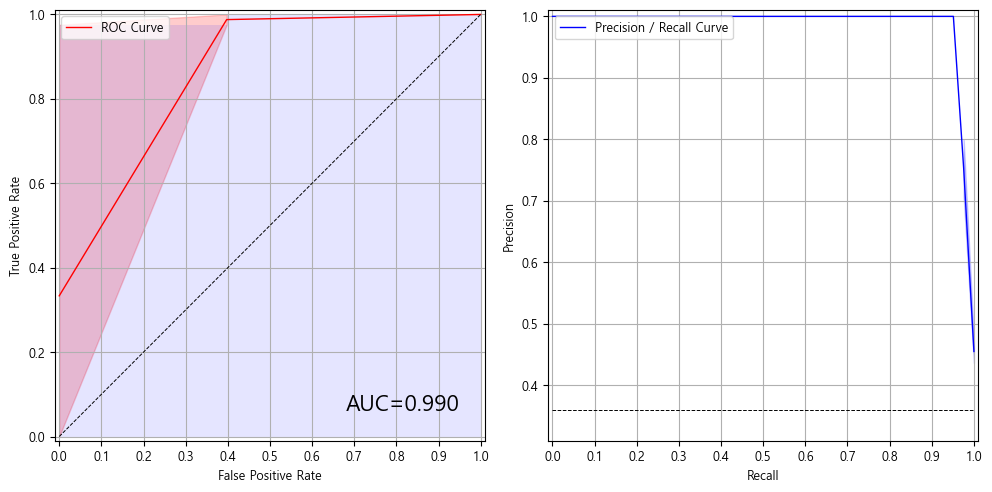


[학습곡선]


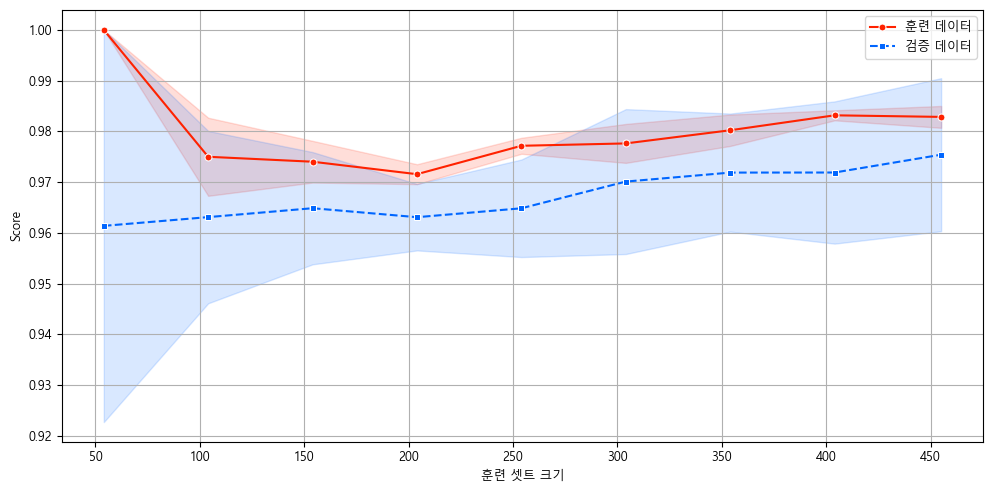

+----+------------+-------------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수                |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+-------------------------+--------------------+------------+---------+------------+---------+------------|
|  2 | diagnosis  | perimeter_mean          |             0.3861 |     73.769 |  0.0052 |      0.996 | 8652.28 |     1.4712 |
|  0 | diagnosis  | radius_mean             |             0.3976 |     74.092 |  0.0054 |      0.996 | 7154.91 |     1.4883 |
| 20 | diagnosis  | radius_worst            |              0.503 |     33.852 |  0.0149 |      0.988 | 989.505 |     1.6537 |
| 22 | diagnosis  | perimeter_worst         |             0.4571 |     23.272 |  0.0196 |      0.984 | 836.304 |     1.5795 |
|  3 | diagnosis  | area_mean               |             0.3794 |      29.39 |  0.0129 |       0.99 | 710.047 |     1.4614 |
| 23 | diagnos

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [13]:
my_logistic_classification(x_train, y_train, x_test, y_test)

## #05. 성능 개선 시도

### [1] 다중 공선성 제거

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.953846 |
| 10 |     1 | l2        |          0.953846 |
| 13 |    10 | l2        |          0.951648 |
| 16 |   100 | l2        |          0.951648 |
|  4 |  0.01 | l2        |           0.90989 |
|  1 | 0.001 | l2        |          0.698901 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.772637 |     0.781514 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.962637 |     0.964912 | 예측 결과(TN,FP,TP,TN)가 실제 결과

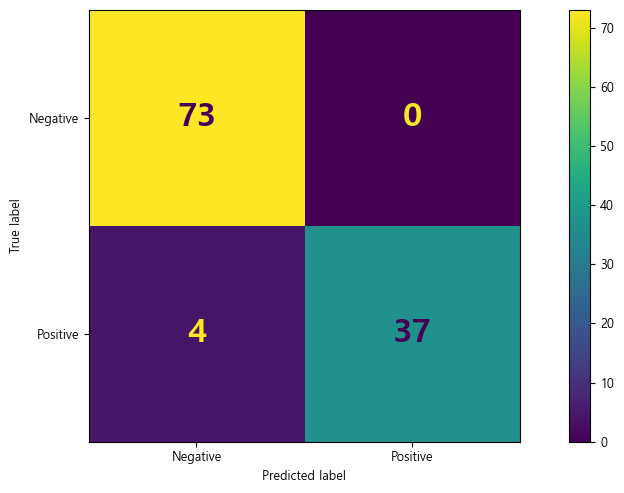


[ROC/PR Curve]


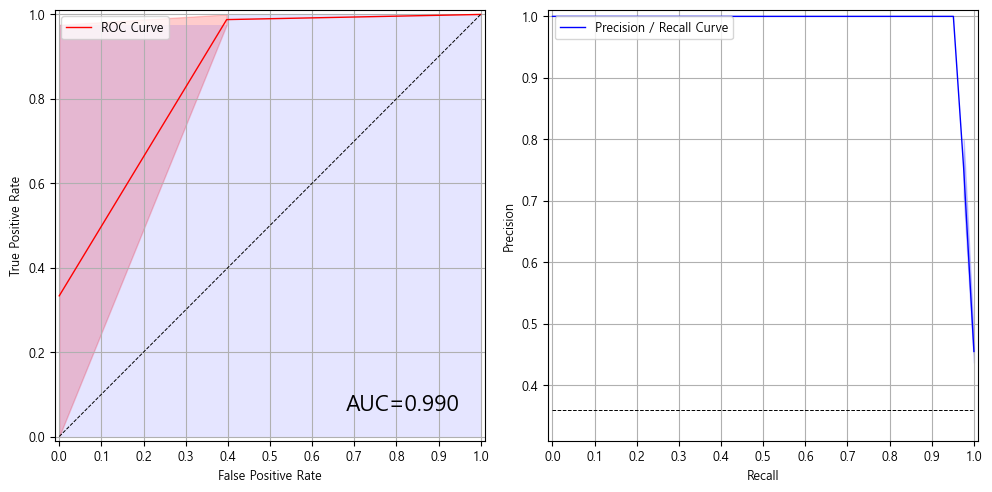


[학습곡선]


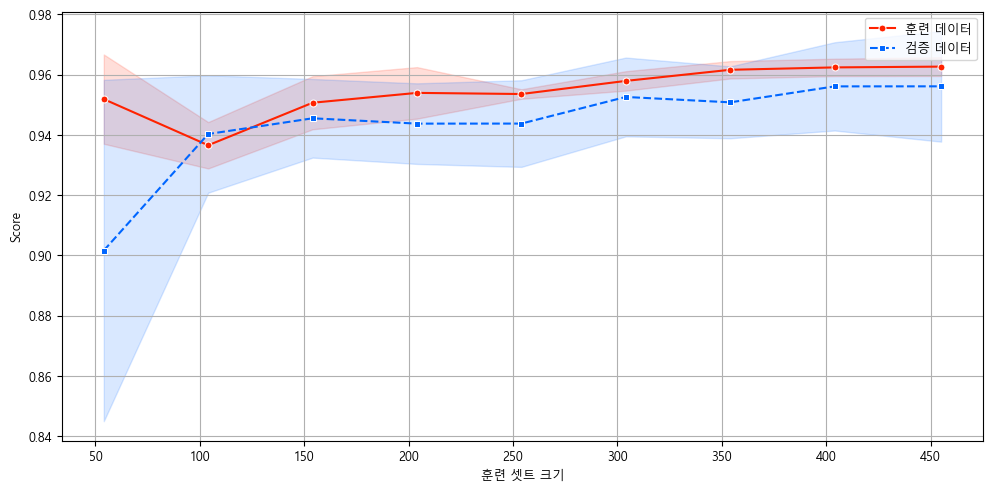

+----+------------+------------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수               |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------------+--------------------+------------+---------+------------+---------+------------|
|  2 | diagnosis  | compactness_mean       |             0.7169 |      1.434 |  0.4998 |      0.617 |  9.3501 |     2.0481 |
|  8 | diagnosis  | concavity_se           |             0.1187 |      1.689 |  0.0703 |      0.944 | 7.97004 |     1.1261 |
|  4 | diagnosis  | fractal_dimension_mean |            -0.4518 |      1.317 | -0.3432 |      0.731 |  6.8349 |     0.6365 |
| 11 | diagnosis  | fractal_dimension_se   |            -0.2457 |      1.322 | -0.1859 |      0.853 | 5.88982 |     0.7821 |
| 12 | diagnosis  | area_worst             |             1.5593 |      1.676 |  0.9301 |      0.352 | 5.84549 |     4.7553 |
|  6 | diagnosis  | pe

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [29]:
ignore = ['perimeter_mean','perimeter_worst','radius_mean','radius_worst','radius_se','concavity_mean','compactness_worst','concave points_worst','area_se','concave points_mean','concavity_worst','area_mean','compactness_se','smoothness_worst','texture_worst','fractal_dimension_worst']
x_tr = x_train.drop(ignore, axis=1)
x_te = x_test.drop(ignore, axis=1)
my_logistic_classification(x_tr, y_train, x_te, y_test)

### [2] 데이터 불균형 해소

#### (1) RandomUnderSampler

In [33]:
undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=777)
x_under, y_under = undersampler.fit_resample(x_train, y_train)
y_under.value_counts()

0    171
1    171
Name: diagnosis, dtype: int64

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.973743 |
| 10 |     1 | l2        |          0.970759 |
| 13 |    10 | l2        |          0.967818 |
| 16 |   100 | l2        |          0.964919 |
|  4 |  0.01 | l2        |          0.944544 |
|  1 | 0.001 | l2        |          0.923998 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |      0.86064 |     0.852299 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.979532 |     0.991228 | 예측 결과(TN,FP,TP,TN)가 실제 결과

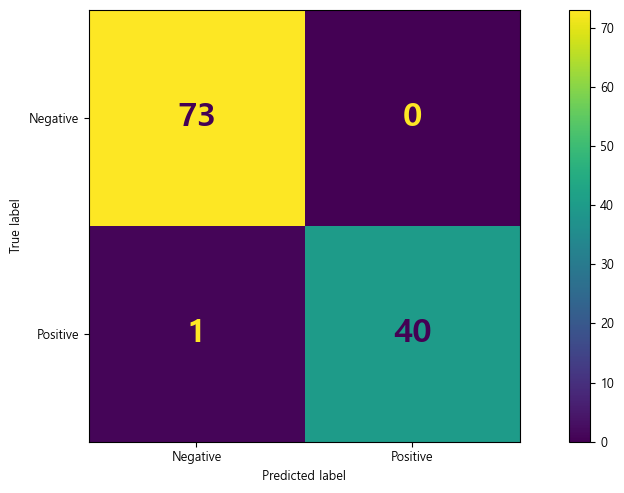


[ROC/PR Curve]


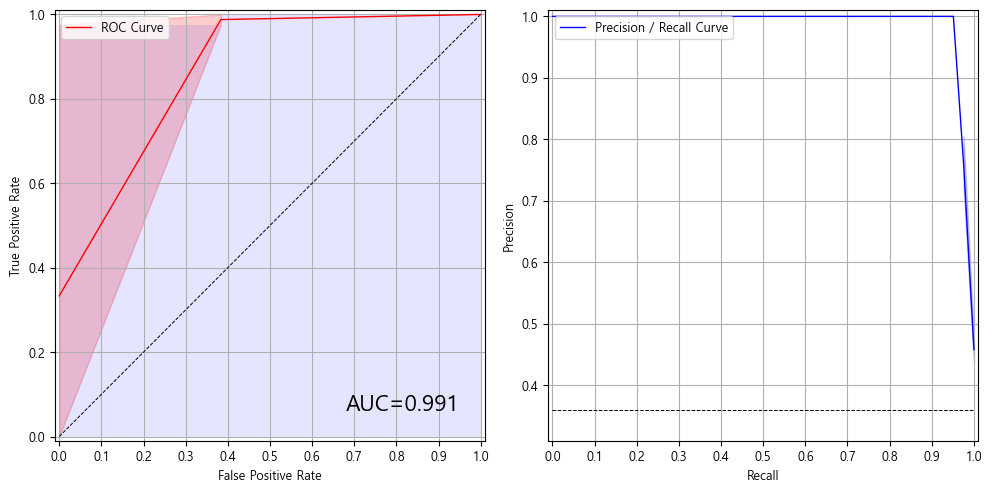


[학습곡선]


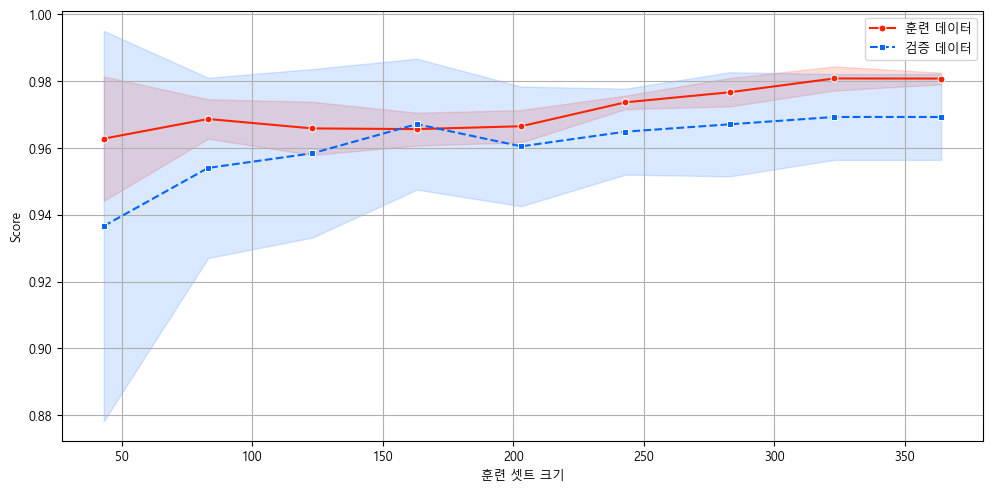

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [34]:
my_logistic_classification(x_under, y_under, x_test, y_test, report=False)

#### (2) RandomOverSampler

In [35]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=777)
x_over, y_over = oversampler.fit_resample(x_train, y_train)
y_over.value_counts()

1    284
0    284
Name: diagnosis, dtype: int64

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.978885 |
|  7 |   0.1 | l2        |          0.977131 |
| 16 |   100 | l2        |          0.975376 |
| 13 |    10 | l2        |          0.971852 |
|  4 |  0.01 | l2        |          0.964835 |
|  1 | 0.001 | l2        |          0.926098 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.933724 |     0.887403 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.987676 |     0.991228 | 예측 결과(TN,FP,TP,TN)가 실제 결과

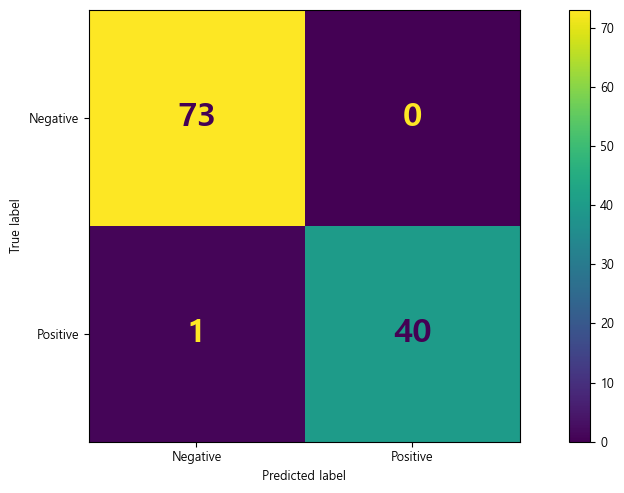


[ROC/PR Curve]


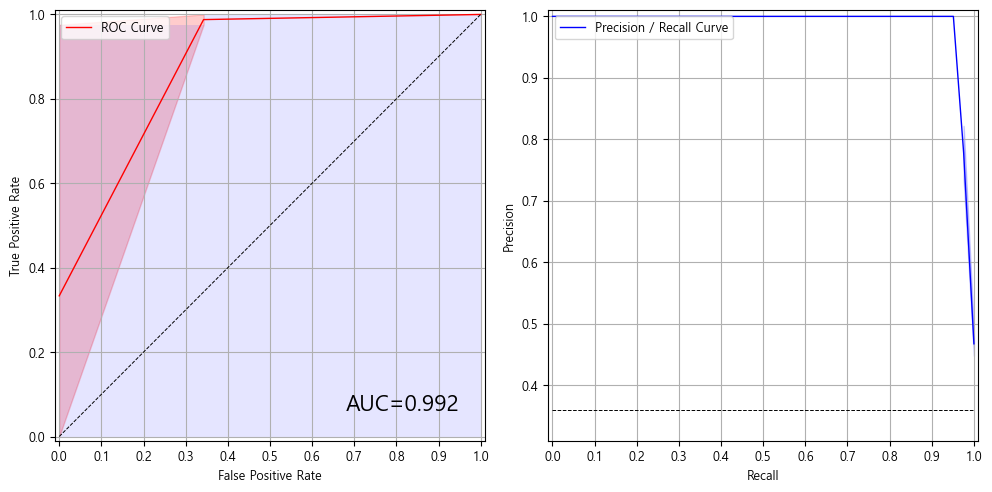


[학습곡선]


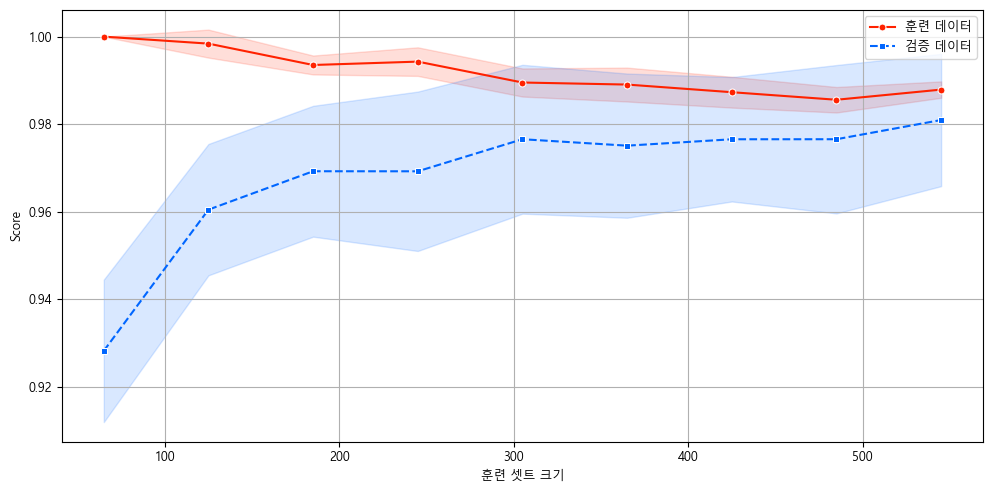

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [36]:
my_logistic_classification(x_over, y_over, x_test, y_test, report=False)

#### (3) SMOTE

In [37]:
smote_sampler = SMOTE(sampling_strategy='minority', k_neighbors=3, random_state=777)
x_sm, y_sm = smote_sampler.fit_resample(x_train, y_train)
y_sm.value_counts()

1    284
0    284
Name: diagnosis, dtype: int64

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.977131 |
| 16 |   100 | l2        |          0.973622 |
| 10 |     1 | l2        |          0.973591 |
| 13 |    10 | l2        |          0.971852 |
|  4 |  0.01 | l2        |          0.959587 |
|  1 | 0.001 | l2        |          0.933163 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.886007 |     0.865105 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.980634 |     0.991228 | 예측 결과(TN,FP,TP,TN)가 실제 결과

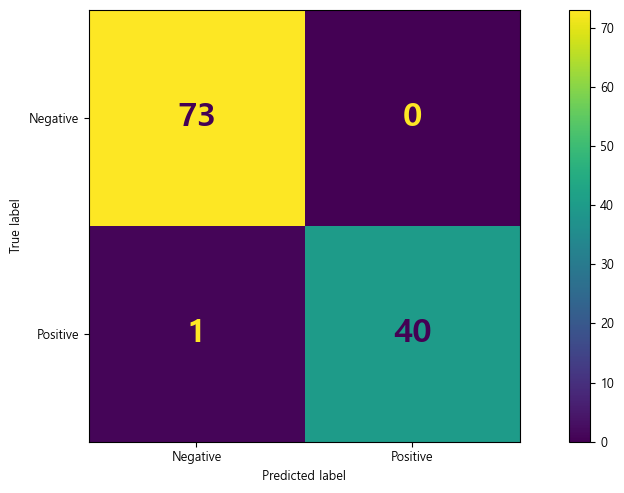


[ROC/PR Curve]


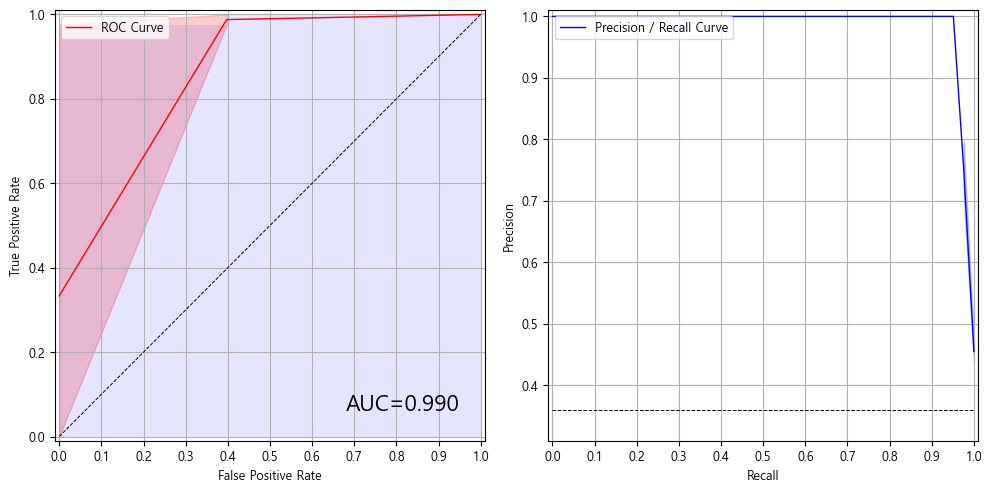


[학습곡선]


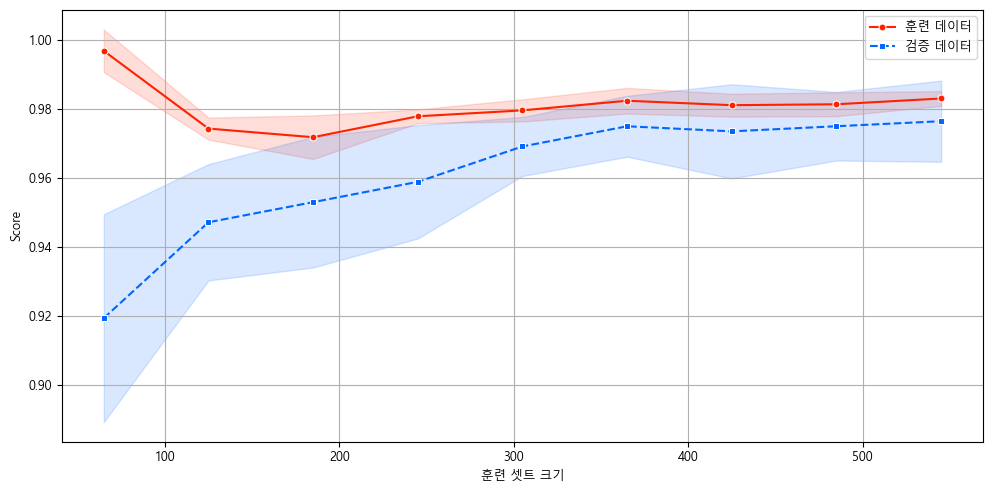

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [38]:
my_logistic_classification(x_sm, y_sm,x_test,y_test,report=False)